# Exploratory Data Analysis
Based on the Kaggle notebook of Akhil Reddy: [Formula 1, A Visual Explorative Analysis](https://www.kaggle.com/code/akhilreddy9554/formula-1-a-visual-explorative-analysis).

## Imports and constants

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import datetime 

In [19]:
DATA_FOLDER = './data/'

In [20]:
# Comment if you don't want dark theme
#plt.style.use('dark_background')

In [21]:
import pandas as pd

# Load the CSV files
results_df = pd.read_csv(DATA_FOLDER + 'results.csv')
constructors_df = pd.read_csv(DATA_FOLDER + 'constructors.csv')
drivers_df = pd.read_csv(DATA_FOLDER + 'drivers.csv')
race_df = pd.read_csv(DATA_FOLDER + "races.csv")

In [22]:
# Join results with constructors to get constructor names
results_with_constructors = pd.merge(results_df, constructors_df, on='constructorId')

# Join the above result with drivers to get driver names
full_data = pd.merge(results_with_constructors, drivers_df, on='driverId')
full_data = pd.merge(full_data, race_df, on='raceId')

In [23]:
full_data = full_data[full_data["year"] > 2000]
# Group by driverId and constructorId to get the count of years
aggregated_data = full_data.groupby(['driverId', 'constructorId']).agg({
    'years': 'sum',  # Sum of years to get total years stayed
    'driverRef': 'first',  # Get the driver name
    'surname': 'first',  # Get the driver name
    'forename': 'first',  # Get the driver name
    'name_x': 'first'  # Get the constructor name
}).reset_index()

aggregated_data = aggregated_data.rename(columns={'years': 'nbRace', 'name_x': 'constructorRef'})

KeyError: "Column(s) ['years'] do not exist"

In [27]:
# Create nodes for drivers and constructors
driver_nodes = aggregated_data[['driverId', 'driverRef']].drop_duplicates().rename(columns={'driverId': 'id', 'driverName': 'name'})
driver_nodes['group'] = 'Driver'

aggregated_data['driverName'] = aggregated_data['forename'] + ' ' + aggregated_data['surname']
driver_nodes = aggregated_data[['driverName']].drop_duplicates().rename(columns={'driverName': 'id'})
driver_nodes['group'] = 'Driver'
driver_nodes['radius'] = 10

# Create nodes for constructors with the required structure
constructor_nodes = aggregated_data[['constructorRef']].drop_duplicates().rename(columns={'constructorRef': 'id'})
constructor_nodes['group'] = 'Team'
constructor_nodes['radius'] = 100
nodes = pd.concat([driver_nodes, constructor_nodes])

# Create links
links = aggregated_data.rename(columns={'constructorRef': 'target', 'nbRace': 'value'})
links['source'] = links['forename'] + ' ' + links['surname']

# Convert nodes and links to dictionaries
nodes_dict = nodes.to_dict(orient='records')
links_dict = links[['source', 'target', 'value']].to_dict(orient='records')

In [28]:
# links_dict(DATA_FOLDER + 'driver_team_links.json', orient='records')
nodes_dict

[{'id': 'Lewis Hamilton', 'group': 'Driver', 'radius': 10},
 {'id': 'Nick Heidfeld', 'group': 'Driver', 'radius': 10},
 {'id': 'Nico Rosberg', 'group': 'Driver', 'radius': 10},
 {'id': 'Fernando Alonso', 'group': 'Driver', 'radius': 10},
 {'id': 'Heikki Kovalainen', 'group': 'Driver', 'radius': 10},
 {'id': 'Kimi Räikkönen', 'group': 'Driver', 'radius': 10},
 {'id': 'Robert Kubica', 'group': 'Driver', 'radius': 10},
 {'id': 'Timo Glock', 'group': 'Driver', 'radius': 10},
 {'id': 'Felipe Massa', 'group': 'Driver', 'radius': 10},
 {'id': 'Jarno Trulli', 'group': 'Driver', 'radius': 10},
 {'id': 'Adrian Sutil', 'group': 'Driver', 'radius': 10},
 {'id': 'Mark Webber', 'group': 'Driver', 'radius': 10},
 {'id': 'Jenson Button', 'group': 'Driver', 'radius': 10},
 {'id': 'Sebastian Vettel', 'group': 'Driver', 'radius': 10},
 {'id': 'Rubens Barrichello', 'group': 'Driver', 'radius': 10},
 {'id': 'Vitantonio Liuzzi', 'group': 'Driver', 'radius': 10},
 {'id': 'Michael Schumacher', 'group': 'Drive

In [29]:
import json

graph = {
    'nodes': nodes_dict,
    'links': links_dict
}

# Save the graph as a JSON file
with open(DATA_FOLDER + 'graph.json', 'w') as f:
    json.dump(graph, f, indent=4)

## Load files

In [4]:
circuits = pd.read_csv(DATA_FOLDER + 'circuits.csv')
laptimes = pd.read_csv(DATA_FOLDER + 'lap_times.csv')
pitstops = pd.read_csv(DATA_FOLDER + 'pit_stops.csv')
seasons = pd.read_csv(DATA_FOLDER + 'seasons.csv',parse_dates=['year'])
status = pd.read_csv(DATA_FOLDER + 'status.csv')

In [5]:
constructor_standings = pd.read_csv(DATA_FOLDER + 'constructor_standings.csv')
constructors = pd.read_csv(DATA_FOLDER + 'constructors.csv')
driver_standings = pd.read_csv(DATA_FOLDER + 'driver_standings.csv')
drivers = pd.read_csv(DATA_FOLDER + 'drivers.csv')

In [6]:
races = pd.read_csv(DATA_FOLDER + 'races.csv', parse_dates=['date'])
constructor_results = pd.read_csv(DATA_FOLDER + 'constructor_results.csv')
results = pd.read_csv(DATA_FOLDER + 'results.csv')
qualifying = pd.read_csv(DATA_FOLDER + 'qualifying.csv')

In [7]:
constructor_colors = pd.read_csv(DATA_FOLDER + 'constructor_colors.csv', sep=';')

# Circuits info integration

In [14]:
# 2024 circuits additionnal information
# circuits_additional_info = [
#     {"name": "Bahrain International Circuit", "length":"5.412", "gpHeld":"21", "lapRecord": "1:31.447", "lapRecordDriver": "Pedro de la Rosa", "lapRecordYear": "2005"},
#     {"name": "Jeddah Corniche Circuit", "length":"6.174", "gpHeld":"", "lapRecord": "1:30.734", "lapRecordDriver": " Lewis Hamilton", "lapRecordYear": "2021"},
#     {"name": "Albert Park Grand Prix Circuit", "length":"5.278", "gpHeld":"", "lapRecord": "1:19.813 ", "lapRecordDriver": "Charles Leclerc", "lapRecordYear": "2024"},
#     {"name": "Suzuka Circuit", "length":"5.807", "gpHeld":"", "lapRecord": "1:30.983 ", "lapRecordDriver": "Lewis Hamilton", "lapRecordYear": "2019"},
#     {"name": "Shanghai International Circuit", "length":"5.451", "gpHeld":"", "lapRecord": "1:32.238", "lapRecordDriver": "Michael Schumacher", "lapRecordYear": "2004"},
#     {"name": "Miami International Autodrome",  "length":"5.412", "gpHeld":"", "lapRecord": "1:29.708", "lapRecordDriver": "Max Verstappen", "lapRecordYear": "2023"},
#     {"name": "Autodromo Enzo e Dino Ferrari", "length":"4.909", "gpHeld":"", "lapRecord": "1:29.708", "lapRecordDriver": "Max Verstappen", "lapRecordYear": "2023"},
#     {"name": "Circuit de Monaco", "length":"3.337", "gpHeld":"", "lapRecord": "1:12.909", "lapRecordDriver": "", "lapRecordYear": ""},
#     {"name": "Circuit Gilles Villeneuve", "length":"", "gpHeld":"", "lapRecord": "", "lapRecordDriver": "Lewis Hamilton", "lapRecordYear": "2021"},
#     {"name": "Circuit de Barcelona-Catalunya", "length":"4.657", "gpHeld":"", "lapRecord": "1:16.330", "lapRecordDriver": "Max Verstappen", "lapRecordYear": "2023"},
#     {"name": "Red Bull Ring", "length":"4.318", "gpHeld":"", "lapRecord": "1:05.619", "lapRecordDriver": "Carlos Sainz Jr.", "lapRecordYear": "2020"},
#     {"name": "Silverstone Circuit", "length":"5.891", "gpHeld":"", "lapRecord": "1:27.097", "lapRecordDriver": "Max Verstappen", "lapRecordYear": "2020"},
#     {"name": "Hungaroring", "length":"4.381", "gpHeld":"", "lapRecord": "1:16.627", "lapRecordDriver": "Lewis Hamilton", "lapRecordYear": "2021"},
#     {"name": "Circuit de Spa-Francorchamps", "length":"", "gpHeld":"", "lapRecord": "", "lapRecordDriver": "", "lapRecordYear": ""},
#     {"name": "Circuit Park Zandvoort", "length":"", "gpHeld":"", "lapRecord": "", "lapRecordDriver": "", "lapRecordYear": ""},
#     {"name": "Autodromo Nazionale di Monza", "length":"", "gpHeld":"", "lapRecord": "", "lapRecordDriver": "", "lapRecordYear": ""},
#     {"name": "Baku City Circuit", "length":"", "gpHeld":"", "lapRecord": "", "lapRecordDriver": "", "lapRecordYear": ""},
#     {"name": "Marina Bay Street Circuit", "length":"", "gpHeld":"", "lapRecord": "", "lapRecordDriver": "", "lapRecordYear": ""},
#     {"name": "Circuit of the Americas", "length":"", "gpHeld":"", "lapRecord": "", "lapRecordDriver": "", "lapRecordYear": ""},
#     {"name": "Autódromo Hermanos Rodríguez", "length":"", "gpHeld":"", "lapRecord": "", "lapRecordDriver": "", "lapRecordYear": ""},
#     {"name": "Autódromo José Carlos Pace", "length":"", "gpHeld":"", "lapRecord": "", "lapRecordDriver": "", "lapRecordYear": ""},
#     {"name": "Las Vegas Strip Street Circuit", "length":"", "gpHeld":"", "lapRecord": "", "lapRecordDriver": "", "lapRecordYear": ""},
#     {"name": "Losail International Circuit", "length":"", "gpHeld":"", "lapRecord": "", "lapRecordDriver": "", "lapRecordYear": ""},
#     {"name": "Yas Marina Circuit", "length":"", "gpHeld":"", "lapRecord": "", "lapRecordDriver": "", "lapRecordYear": ""},
# ]
circuits_additional_info = pd.read_csv(DATA_FOLDER + 'circuits_additional_info.csv')


circuits_additional_info = pd.DataFrame(circuits_additional_info)
circuits_full = circuits_additional_info.merge(circuits, left_on='name', right_on='name', how='left')
circuits_full = circuits_full.reset_index()

In [15]:
circuits_full

index  Unnamed: 0                            name  length  gpHeld  \
0       0           0   Bahrain International Circuit   5.412      21   
1       1           1         Jeddah Corniche Circuit   6.174       2   
2       2           2  Albert Park Grand Prix Circuit   5.278      25   
3       3           3                  Suzuka Circuit   5.807      34   
4       4           4  Shanghai International Circuit   5.451      16   
5       5           5   Miami International Autodrome   5.412       2   
6       6           6   Autodromo Enzo e Dino Ferrari   4.909      29   
7       7           7               Circuit de Monaco   3.337      68   
8       8           8       Circuit Gilles Villeneuve   4.361      40   
9       9           9  Circuit de Barcelona-Catalunya   4.657      33   
10     10          10                   Red Bull Ring   4.318      36   
11     11          11             Silverstone Circuit   5.891      57   
12     12          12                     Hungaroring   4.381      38   
13     13          13    Circuit de Spa-Francorchamps   7.004      55   
14     14          14          Circuit Park Zandvoort   4.259      34   
15     15          15    Autodromo Nazionale di Monza   5.793      74   
16     16          16               Baku City Circuit   6.003       6   
17     17          17       Marina Bay Street Circuit   5.063      13   
18     18          18         Circuit of the Americas   5.513      10   
19     19          19    Autódromo Hermanos Rodríguez   4.304      22   
20     20          20      Autódromo José Carlos Pace   4.309      41   
21     21          21  Las Vegas Strip Street Circuit   6.120       1   
22     22          22    Losail International Circuit   5.380       2   
23     23          23              Yas Marina Circuit   5.281      14   

   lapRecord     lapRecordDriver  lapRecordYear  circuitId     circuitRef  \
0   1:31.447    Pedro de la Rosa         2005.0          3        bahrain   
1   1:30.734      Lewis Hamilton         2021.0         77         jeddah   
2   1:19.813     Charles Leclerc         2024.0          1    albert_park   
3   1:30.983      Lewis Hamilton         2019.0         22         suzuka   
4   1:32.238  Michael Schumacher         2004.0         17       shanghai   
5   1:29.708      Max Verstappen         2023.0         79          miami   
6   1:29.708      Max Verstappen         2023.0         21          imola   
7   1:12.909                 NaN            NaN          6         monaco   
8   1:13.078     Valtteri Bottas         2019.0          7     villeneuve   
9   1:16.330      Max Verstappen         2023.0          4      catalunya   
10  1:05.619    Carlos Sainz Jr.         2020.0         70  red_bull_ring   
11  1:27.097      Max Verstappen         2020.0          9    silverstone   
12  1:16.627      Lewis Hamilton         2021.0         11    hungaroring   
13  1:46.286     Valtteri Bottas         2018.0         13            spa   
14  1:11.097      Lewis Hamilton         2021.0         39      zandvoort   
15  1:18.887      Lewis Hamilton         2020.0         14          monza   
16  1:43.009     Charles Leclerc         2019.0         73           baku   
17  1:41.905     Kevin Magnussen         2018.0         15     marina_bay   
18  1:36.169     Charles Leclerc         2019.0         69       americas   
19  1:17.774     Valtteri Bottas         2021.0         32      rodriguez   
20  1:10.540     Valtteri Bottas         2018.0         18     interlagos   
21       NaN                 NaN            NaN         80          vegas   
22  1:23.196      Max Verstappen         2023.0         78         losail   
23  1:26.103      Lewis Hamilton         2019.0         24     yas_marina   

       location        country      lat        lng   alt  \
0        Sakhir        Bahrain  26.0325   50.51060     7   
1        Jeddah   Saudi Arabia  21.6319   39.10440    15   
2     Melbourne      Australia -37.8497  144.96800    10   
3        Suz

In [16]:
circuits_full.to_json(DATA_FOLDER + 'map_info.json', orient='records')

# Season evolution

In [11]:
res = driver_standings.merge(drivers, on='driverId', how='left').merge(races, on='raceId', how='left')
res = res.merge(circuits, on='circuitId', how='left')

res = res[['raceId', 'year', 'date', 'points', 'position', 'driverId', 'forename', 'surname', 'circuitId', 'name_x', 'name_y', 'country']]
res = res.rename(columns={'name_x': 'gp_name', 'name_y': 'circuit_name'})

res = res.merge(results[['raceId', 'driverId', 'constructorId']], on=['raceId', 'driverId'], how='left')
res = res.merge(constructor_colors, on='constructorId', how='left')

In [13]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Assuming `res` is your DataFrame
# TODO add the final standing in the championship and sort them by it
res = res.sort_values(by=['year', 'date', 'surname'], ascending=[False, True, True])
res.to_json(DATA_FOLDER + 'season_evolution.json', orient='records')

# Create a list of unique years
years = res['year'].unique()

# Create a figure
fig = go.Figure()

# Add traces for each driver for each year
for year in years:
    year_res = res[res['year'] == year]
    for driver in year_res['driverId'].unique():
        driver_res = year_res[year_res['driverId'] == driver]
        fig.add_trace(go.Scatter(x=driver_res['gp_name'], y=driver_res['points'], mode='lines+markers', 
                                 name=f'{driver_res.iloc[0]["forename"]} {driver_res.iloc[0]["surname"]} ({year})',
                                 line=dict(color=driver_res.iloc[0]['color'] if pd.notna(driver_res.iloc[0]['color']) else 'gray'),
                                 visible=(year == years[0])))

# Create dropdown buttons
dropdown_buttons = []
for year in years:
    visible = [trace.name.endswith(f'({year})') for trace in fig.data]
    dropdown_buttons.append(dict(label=str(year), method='update', args=[{'visible': visible}, {'title': f'Points of drivers in {year}'}]))

# Update layout with dropdown menu
fig.update_layout(
    title=f'Points of drivers in {years[0]}',
    xaxis_title='Date',
    yaxis_title='Points',
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        direction='down',
        showactive=True,
    )]
)

fig.show()

## Constructor analysis

In [7]:
#merging the constructors dataframe with race results
teams = constructors.merge(results,on='constructorId',how = 'left')

### Most wins

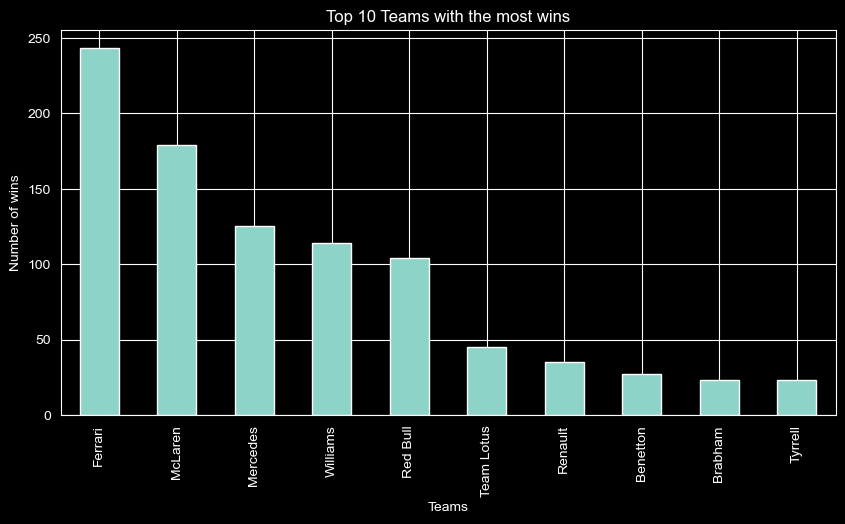

In [8]:
# get the number of wins per team
team_wins = teams[teams['positionOrder'] == 1].groupby('name')['name'].count().sort_values(ascending=False)

# plot the 10 teams with the most wins
plt.figure(figsize=(10,5))
team_wins[:10].plot(kind='bar')
plt.title('Top 10 Teams with the most wins')
plt.ylabel('Number of wins')
plt.xlabel('Teams')

#plt.gcf().set_facecolor('none')
# Save the figure with a transparent background
plt.savefig('./img/most_team_win.png', transparent=True)
plt.show()


### Most races participated in

In [9]:
#extracting the columns needed and grouping it by constructor name, extracting the total races entered

team_races = teams[['name','points','raceId']]
team_races = team_races.groupby('name')['raceId'].nunique().sort_values(ascending=False)

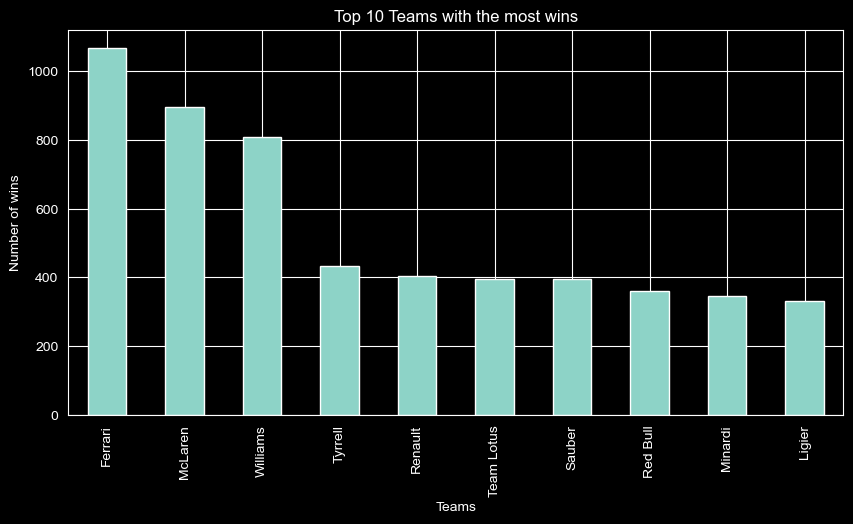

In [10]:
# plot using matplotlib
plt.figure(figsize=(10,5))
team_races[:10].plot(kind='bar')
plt.title('Top 10 Teams with the most wins')
plt.ylabel('Number of wins')
plt.xlabel('Teams')
plt.savefig('./img/most_races.png', transparent=True)
plt.show()

## Geography

### Drivers Distribution by Country

In [ ]:
# grouping by nationality, counting the driver and plotting a pie chart

driver_nationality = drivers.groupby('nationality')['nationality'].count().sort_values(ascending = False).reset_index(name = 'number of drivers')
fig = go.Figure(data=[go.Pie(labels=driver_nationality.nationality.head(10), values=driver_nationality['number of drivers'])])
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(
    title="Historical Driver Nationality Distribution since 1950")

fig.write_image("img/nationality_dist.png")
fig.show()

### Number of Champions by Country

In [12]:
#merging drivers, driver standings and race data 
driver_position = drivers.merge(driver_standings,left_on='driverId',right_on='driverId',how = 'left')
driver_position = driver_position.merge(races,on = 'raceId',how = 'left')

champions = driver_position.groupby(['nationality','year','surname'])[['points','wins']
                                            ].max().sort_values('points',ascending = False).reset_index()
champions.drop_duplicates(subset=['year'], inplace=True)

<Figure size 1000x500 with 0 Axes>

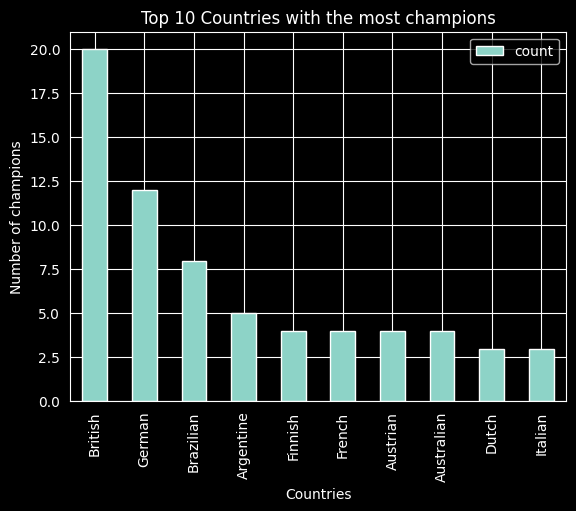

In [13]:
champion_nations = champions.nationality.value_counts().sort_values(ascending=False).to_frame().head(10)
# plot the number champions for the top 10 countries in matplotlib
plt.figure(figsize=(10,5))
champion_nations.plot(kind='bar')
plt.title('Top 10 Countries with the most champions')
plt.ylabel('Number of champions')
plt.xlabel('Countries')
plt.savefig('./img/most_countries.png', transparent=True)
plt.show()

### Distribution of Champions by Country

In [ ]:
# counting the number of times a nation ended in P1 and plotting a pie chart

champion_nations = champions.nationality.value_counts().to_frame()
fig = go.Figure(data=[go.Pie(labels=champion_nations.index, values=champion_nations['nationality'])])
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(
    title="Distribution of Historic Champions by Nation")
fig.show()

### Ratio of champions according to the nation number of drivers

In [ ]:
#grouping by nationality year and surname to get the max points achieved every season and dropping year duplicates

champion_drivers = driver_position.groupby(['nationality','year','surname'])[['points','wins']
                                            ].max().sort_values('points',ascending = False).reset_index()
champion_drivers.drop_duplicates(subset=['year'], inplace=True)

#grouping by nationality and counting the surname of drivers 

final = champion_drivers.groupby('nationality')['surname'].nunique().reset_index(name = 'champions').sort_values(
    by='champions',ascending = False)

#merging both the datasets and creating a column to calculate the ratio

ratios = final.merge(driver_nationality,on='nationality',how='inner')
ratios['perc_winners'] = (ratios.champions/ratios['number of drivers']*100).round(2)
ratios = ratios.sort_values('perc_winners',ascending = False)

In [ ]:
#creating a bar chart

df = ratios
fig = px.bar(df, x='nationality', y='perc_winners',
         hover_data=['champions','number of drivers'], color='number of drivers',
         height=400)
fig.update_traces(textfont_size=20,
              marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(
    title="Champions from a nation with respect to total drivers from the nation")
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

## Drivers analysis

### Number of race wins

In [17]:
race_wins = drivers.merge(results,left_on='driverId',right_on='driverId',how = 'left')
race_wins['full_name'] = race_wins['forename'] + ' ' + race_wins['surname']

race_wins = race_wins[['full_name','positionOrder']]

highest_rw = race_wins[race_wins['positionOrder'] == 1.0].groupby('full_name').count().sort_values('positionOrder', ascending = False).reset_index()

<Figure size 1000x500 with 0 Axes>

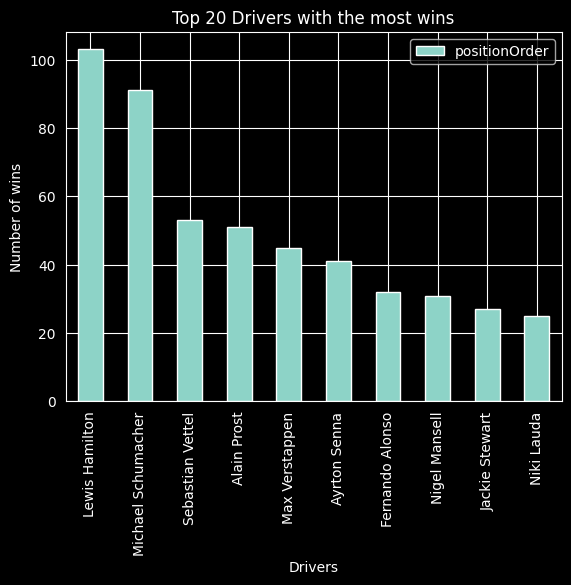

In [18]:
# gen a graph of the top 20 drivers with the most wins using matplotlib

plt.figure(figsize=(10,5))
highest_rw[:10].plot(kind='bar',x='full_name',y='positionOrder')
plt.title('Top 20 Drivers with the most wins')
plt.ylabel('Number of wins')
plt.xlabel('Drivers')
plt.savefig('./img/most_race_win.png', transparent=True)
plt.show()


### Number of pole positions

In [19]:
driver_quali = results.merge(drivers,left_on = 'driverId',right_on='driverId',how = 'left')
driver_quali['full_name'] = driver_quali['forename'] + ' ' + driver_quali['surname']
driver_quali = driver_quali[['full_name','grid','position']]


quali_wins = driver_quali[driver_quali['grid'] == 1].groupby('full_name')['grid'].sum().reset_index(
                                        name = 'grid poles').sort_values('grid poles',ascending = False)

quali_wins = quali_wins.reset_index(col_level=0)
quali_wins.drop('index',axis = 1,inplace = True)

<Figure size 1000x500 with 0 Axes>

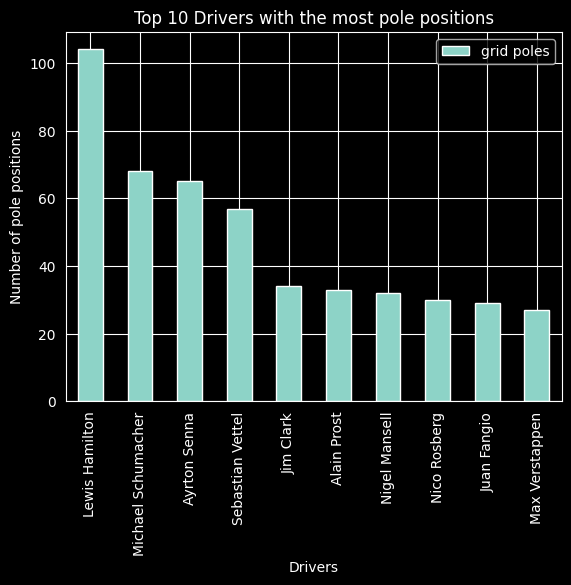

In [20]:
# plot the top 10 drivers with the most pole positions using matplotlib
plt.figure(figsize=(10,5))
quali_wins[:10].plot(kind='bar',x='full_name',y='grid poles')
plt.title('Top 10 Drivers with the most pole positions')
plt.ylabel('Number of pole positions')
plt.xlabel('Drivers')
plt.savefig('./img/most_pole.png', transparent=True)
plt.show()

### Most wins in a single season

In [21]:
#merging driver data, their standings and race data

driver_position = drivers.merge(driver_standings,left_on='driverId',right_on='driverId',how = 'left')
driver_position = driver_position.merge(races,on = 'raceId',how = 'left')

In [22]:
#filtering the dataset to include only where the position is 1 and grouping by name, year and extracting the max wins

positions = driver_position[driver_position['position'] == 1].groupby(
    ['surname','year'])['wins'].max().sort_values(ascending=False).reset_index(name = 'Wins')
positions.head(20)
positions.year = positions.year.dt.year
positions.rename(columns={'surname':'name'},inplace=True)
positions.Wins = positions.Wins.astype('int64')

In [23]:
#plotting a bubble chart

fig = px.scatter(positions.head(30), x="year", y="Wins", color="name",
                 title="Most wins by a driver in a single season",size = 'Wins')
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_xaxes(showgrid=False)
fig.show()

## Circuit Stats: Fastest Lap on each Circuit

In [8]:
# gathering races, results and drivers data
circuit_summary = circuits.merge(races,left_on='circuitId', right_on='circuitId', how = 'left')
circuit_summary = circuit_summary.merge(results,on='raceId',how = 'left')
circuit_summary = circuit_summary.merge(drivers,left_on='driverId',right_on='driverId',how = 'inner')

# dropping null values and converting fastestlaptime into seconds
circuit_summary = circuit_summary.dropna(subset=['fastestLapTime'], axis = 0)
circuit_summary = circuit_summary.rename(columns={'name_x':'circuit_name','name_y':'driver_name'})
# remove rows with \N value in fastestLapTime
circuit_summary = circuit_summary[circuit_summary['fastestLapTime'] != '\\N']
circuit_summary['fastestLapTime_seconds']=circuit_summary['fastestLapTime'].apply(lambda x: float(x.split(':')[0])*60+float(x.split(':')[1])) 

#grouping by circuit name and extracting the fastest lap time, keeping all circuit_summary columns
circuit_summary['fastest_recorded_lap'] = circuit_summary.groupby(['circuit_name'])['fastestLapTime_seconds'].transform('min')
fastest = circuit_summary[circuit_summary['fastest_recorded_lap']==circuit_summary['fastestLapTime_seconds']].sort_values('country').reset_index(col_level = 1)
fastest.drop(['index','fastest_recorded_lap'],inplace=True,axis = 1)
fastest['year'] = fastest.year.dt.year

# rename alt by altitude [m]
fastest.rename(columns={'alt':'altitude [m]'},inplace=True)

C:\Users\xagao\AppData\Local\Temp\ipykernel_28612\1462291787.py:2: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)


<Figure size 1000x500 with 0 Axes>

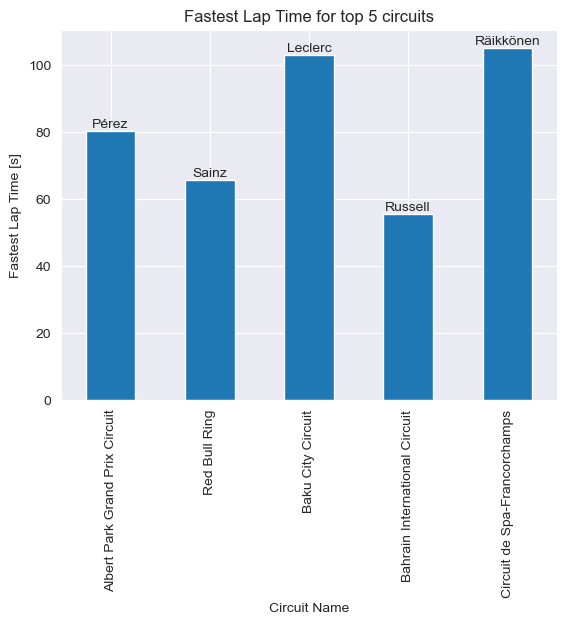

In [9]:
plt.figure(figsize=(10,5),constrained_layout=True)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
fastest.head(5).plot(kind='bar',x='circuit_name',y='fastestLapTime_seconds')
plt.title('Fastest Lap Time for top 5 circuits')
plt.ylabel('Fastest Lap Time [s]')
plt.xlabel('Circuit Name')

# add driver name as annotation
for i in range(5):
    plt.text(i,fastest['fastestLapTime_seconds'][i]+1,fastest['surname'][i],rotation=0, ha='center')
    
plt.legend().remove()
plt.savefig('./img/fastest_lap_l.png', transparent=True, bbox_inches='tight')
plt.show()

####  